In [1]:
%matplotlib inline


# Stochastic examples


This example is designed to show how to use the stochatic optimization
algorithms for descrete and semicontinous measures from the POT library.




In [2]:
# Author: Kilian Fatras <kilian.fatras@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import numpy as np
import ot
import ot.plot

COMPUTE TRANSPORTATION MATRIX FOR SEMI-DUAL PROBLEM
############################################################################



In [3]:
print("------------SEMI-DUAL PROBLEM------------")

------------SEMI-DUAL PROBLEM------------


DISCRETE CASE
Sample two discrete measures for the discrete case
---------------------------------------------

Define 2 discrete measures a and b, the points where are defined the source
and the target measures and finally the cost matrix c.



In [4]:
n_source = 7
n_target = 4
reg = 1
numItermax = 1000

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "SAG" method to find the transportation matrix in the discrete case
---------------------------------------------

Define the method "SAG", call ot.solve_semi_dual_entropic and plot the
results.



In [5]:
method = "SAG"
sag_pi = ot.stochastic.solve_semi_dual_entropic(a, b, M, reg, method,
                                                numItermax)
print(sag_pi)

[[2.55553509e-02 9.96395660e-02 1.76579142e-02 4.31178196e-06]
 [1.21640234e-01 1.25357448e-02 1.30225078e-03 7.37891338e-03]
 [3.56123975e-03 7.61451746e-02 6.31505947e-02 1.33831456e-07]
 [2.61515202e-02 3.34246014e-02 8.28734709e-02 4.07550428e-04]
 [9.85500870e-03 7.52288517e-04 1.08262628e-02 1.21423583e-01]
 [2.16904253e-02 9.03825797e-04 1.87178503e-03 1.18391107e-01]
 [4.15462212e-02 2.65987989e-02 7.23177216e-02 2.39440107e-03]]


SEMICONTINOUS CASE
Sample one general measure a, one discrete measures b for the semicontinous
case
---------------------------------------------

Define one general measure a, one discrete measures b, the points where
are defined the source and the target measures and finally the cost matrix c.



In [6]:
n_source = 7
n_target = 4
reg = 1
numItermax = 1000
log = True

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "ASGD" method to find the transportation matrix in the semicontinous
case
---------------------------------------------

Define the method "ASGD", call ot.solve_semi_dual_entropic and plot the
results.



In [7]:
method = "ASGD"
asgd_pi, log_asgd = ot.stochastic.solve_semi_dual_entropic(a, b, M, reg, method,
                                                           numItermax, log=log)
print(log_asgd['alpha'], log_asgd['beta'])
print(asgd_pi)

[3.75309361 7.63288278 3.76418767 2.53747778 1.70389504 3.53981297
 2.67663944] [-2.49164966 -2.25281897 -0.77666675  5.52113539]
[[2.19699465e-02 1.03185982e-01 1.76983379e-02 2.87611188e-06]
 [1.20688044e-01 1.49823131e-02 1.50635578e-03 5.68043045e-03]
 [3.01194583e-03 7.75764779e-02 6.22686313e-02 8.78225379e-08]
 [2.28707628e-02 3.52120795e-02 8.44977549e-02 2.76545693e-04]
 [1.19721129e-02 1.10087991e-03 1.53333937e-02 1.14450756e-01]
 [2.65247890e-02 1.33140544e-03 2.66861405e-03 1.12332334e-01]
 [3.71512413e-02 2.86513804e-02 7.53932500e-02 1.66127118e-03]]


Compare the results with the Sinkhorn algorithm
---------------------------------------------

Call the Sinkhorn algorithm from POT



In [8]:
sinkhorn_pi = ot.sinkhorn(a, b, M, reg)
print(sinkhorn_pi)

[[2.55535622e-02 9.96413843e-02 1.76578860e-02 4.31043335e-06]
 [1.21640742e-01 1.25369034e-02 1.30234529e-03 7.37715259e-03]
 [3.56096458e-03 7.61460101e-02 6.31500344e-02 1.33788624e-07]
 [2.61499607e-02 3.34255577e-02 8.28741973e-02 4.07427179e-04]
 [9.85698720e-03 7.52505948e-04 1.08291770e-02 1.21418473e-01]
 [2.16947591e-02 9.04086158e-04 1.87228707e-03 1.18386011e-01]
 [4.15442692e-02 2.65998963e-02 7.23192701e-02 2.39370724e-03]]


PLOT TRANSPORTATION MATRIX
#############################################################################



Plot SAG results
----------------



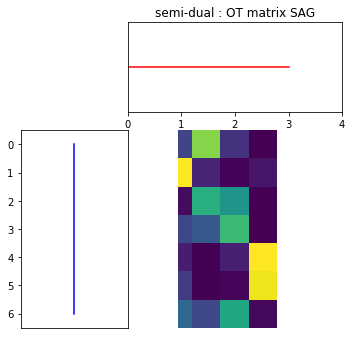

In [9]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sag_pi, 'semi-dual : OT matrix SAG')
pl.show()

Plot ASGD results
-----------------



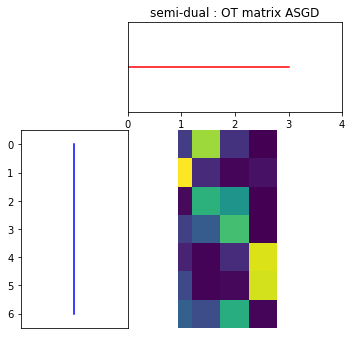

In [10]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, asgd_pi, 'semi-dual : OT matrix ASGD')
pl.show()

Plot Sinkhorn results
---------------------



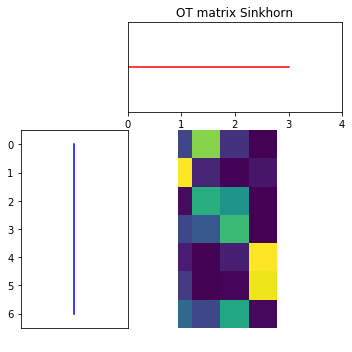

In [11]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sinkhorn_pi, 'OT matrix Sinkhorn')
pl.show()

COMPUTE TRANSPORTATION MATRIX FOR DUAL PROBLEM
############################################################################



In [12]:
print("------------DUAL PROBLEM------------")

------------DUAL PROBLEM------------


SEMICONTINOUS CASE
Sample one general measure a, one discrete measures b for the semicontinous
case
---------------------------------------------

Define one general measure a, one discrete measures b, the points where
are defined the source and the target measures and finally the cost matrix c.



In [13]:
n_source = 7
n_target = 4
reg = 1
numItermax = 100000
lr = 0.1
batch_size = 3
log = True

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "SGD" dual method to find the transportation matrix in the
semicontinous case
---------------------------------------------

Call ot.solve_dual_entropic and plot the results.



In [14]:
sgd_dual_pi, log_sgd = ot.stochastic.solve_dual_entropic(a, b, M, reg,
                                                         batch_size, numItermax,
                                                         lr, log=log)
print(log_sgd['alpha'], log_sgd['beta'])
print(sgd_dual_pi)

[ 1.67648902  5.3770004   1.70385554  0.4276547  -0.77206786  1.0474898
  0.54202203] [-0.23723788 -0.20259434  1.30855788  8.06179985]
[[2.62451875e-02 1.00499531e-01 1.78515577e-02 4.57450829e-06]
 [1.20510690e-01 1.21972758e-02 1.27002374e-03 7.55197481e-03]
 [3.65708350e-03 7.67963231e-02 6.38381061e-02 1.41974930e-07]
 [2.64286344e-02 3.31748063e-02 8.24445965e-02 4.25479786e-04]
 [9.59295422e-03 7.19190875e-04 1.03739180e-02 1.22100712e-01]
 [2.09087627e-02 8.55676046e-04 1.77617241e-03 1.17896019e-01]
 [4.18792948e-02 2.63326297e-02 7.17598381e-02 2.49335733e-03]]


Compare the results with the Sinkhorn algorithm
---------------------------------------------

Call the Sinkhorn algorithm from POT



In [15]:
sinkhorn_pi = ot.sinkhorn(a, b, M, reg)
print(sinkhorn_pi)

[[2.55535622e-02 9.96413843e-02 1.76578860e-02 4.31043335e-06]
 [1.21640742e-01 1.25369034e-02 1.30234529e-03 7.37715259e-03]
 [3.56096458e-03 7.61460101e-02 6.31500344e-02 1.33788624e-07]
 [2.61499607e-02 3.34255577e-02 8.28741973e-02 4.07427179e-04]
 [9.85698720e-03 7.52505948e-04 1.08291770e-02 1.21418473e-01]
 [2.16947591e-02 9.04086158e-04 1.87228707e-03 1.18386011e-01]
 [4.15442692e-02 2.65998963e-02 7.23192701e-02 2.39370724e-03]]


Plot  SGD results
-----------------



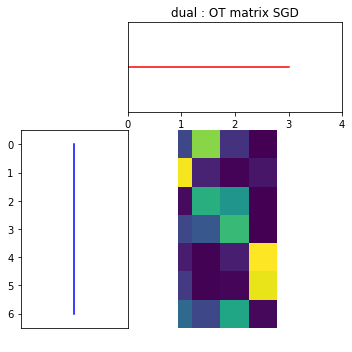

In [16]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sgd_dual_pi, 'dual : OT matrix SGD')
pl.show()

Plot Sinkhorn results
---------------------



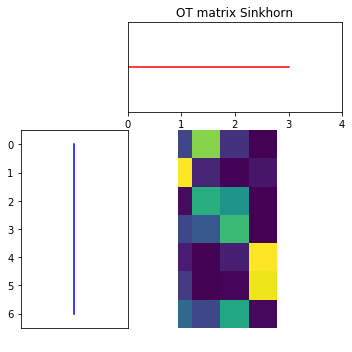

In [17]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sinkhorn_pi, 'OT matrix Sinkhorn')
pl.show()